# Breadth First Search - *Uninformed Search*

### Overview
This notebook implements Breadth First Search (BFS) an uninformed search algorithm. The goal is to find a path from the start to the finish in a maze represented as a 2D array.
### Breadth First Search
- Breadth First Search (BFS) explores all nodes at each depth, before expanding nodes at a layer under.  This means unlike DFS, the node in the frontier are explored using a First In First Out (FIFO) queue, where the *oldest* discovered node is expanded first.
- This implementation of BFS will include `path-cost` to return an optimal solution.
### Search Strategy
- Initializes the frontier using the initial state of the problem. Explore set = None.
- Take the *first* node in the queue and removes it from the frontier. 
- Check if the node is goal state. 
- if the frontier is empty break. 
- if not? FIFO pop() (oldest) from frontier.
- Add the node to explored set
- For every neighbour of the current node
- Loop until frontier is empty or goal is found. 

### Steps:
1. **Convert the maze into a 2D Array**: Load maze data and convert it to integer format for processing.
2. **Implementing BFS**: Use a stack class with FIFO queue to manage the nodes during the search process.
3. **Visualizing the Path**: Use matplotlib to illustrate the start, the path, and the goal within the maze.




# Implementing Breadth First Search

In [85]:
# import the modules creates
# These come from the source_code file


# Load and Prepare Maze Data
1. Load the maze data and convert it to a usable format.
2. Find the starting state (2)
3. Find the end state (9) 

In [86]:
from Breadth_First_Search import *
from Helpers import *
from Visualisations import *


In [87]:
# take the string maze, load it to text with numpy
# Convert string type to int
maze_array_string = np.loadtxt('/Users/calebcougle/PycharmProjects/CAI104_COUGLE_A3/Mazes/a3maze.txt', dtype='str', delimiter=",")
a3_maze = string_to_int_array(maze_array_string)

# The output is a 2D numpy array 
print(a3_maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 9 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [88]:
a3_maze_start = find_start(a3_maze)
a3_maze_goal_point = find_goal(a3_maze)

print("Start", a3_maze_start,"Goal:", a3_maze_goal_point)

Start (2, 2) Goal: (4, 20)


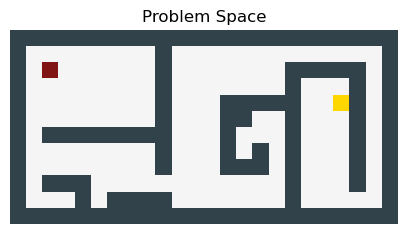

In [89]:
plot_maze(a3_maze, "Problem Space")

# FIFO Queue Class Definition
- The data queue class from DFS can be adapted for BFS; *however*, it functions as a LIFO with the `FIFO_Pop()` method.
- The stack holds the frontier or 'discovered' nodes pending exploration.
- The class methods labeled FIFO implement the BFS search strategy, `First in First Out`, returning the oldest node from the queue
(Russell & Norvig, 2016)

# Breadth First Search (BFS) Implementation

- **Function Definition**: The `bfs()` function implements the breadth-first search algorithm, utilizing methods from the `fifo` class to manage nodes during the search.
- **Initial State**: The starting node (`start`) is pushed onto the stack, as identified in previous functions.
- **Predecessors Dictionary**: The `predecessors{}` dictionary functions similarly to an explored list; it records node traversal and returns the solution path when the goal is found.
- **Current Node**: The `current_cell`, analogous to the current node, is the most recently added node on the stack, retrieved using the `fifo.pop(0)` method.
- **Expanding Frontier**: The frontier expands as the nested `for` loop iterates over directions, pushing neighbors onto the stack. Neighbors are discovered by adding the directional offset to the current node's array index. *Example:* Turn Right = `current_column + 1`.
- **Dead End Handling**: The `is_legal_pos()` function checks for dead ends, walls, and maze boundaries, ensuring movements are within the permissible range.
- **Goal Check & Solution Path**: If the current node is the goal, the `get_path()` function is invoked to backtrack through the `predecessors` dictionary and construct the path from the start to the goal.


In [90]:
bfs_solution_path, bfs_traversed = bfs(a3_maze, a3_maze_start, a3_maze_goal_point)
print("Solution path:", bfs_solution_path,"\nTraversed:", bfs_traversed)

Solution path: [(2, 2), (3, 2), (4, 2), (5, 2), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9), (9, 10), (8, 10), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22), (6, 22), (7, 22), (8, 22), (9, 22), (10, 22), (10, 21), (10, 20), (9, 20), (8, 20), (7, 20), (6, 20), (5, 20), (4, 20)] 
Traversed: [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1), (1, 4), (2, 5), (3, 4), (4, 3), (5, 2), (4, 1), (1, 5), (2, 6), (3, 5), (4, 4), (5, 3), (5, 1), (1, 6), (2, 7), (3, 6), (4, 5), (5, 4), (6, 1), (1, 7), (2, 8), (3, 7), (4, 6), (5, 5), (7, 1), (1, 8), (3, 8), (4, 7), (5, 6), (7, 2), (8, 1), (4, 8), (5, 7), (7, 3), (8, 2), (9, 1), (5, 8), (7, 4), (8, 3), (10, 1), (7, 5), (8, 4), (10, 2), (7, 6), (8, 5), (10, 3), (7, 7), (8, 6), (9, 5), (7, 8), (8, 7),

In [91]:
# # Import necessary functions from the helpers module
# from Helpers import get_path, is_legal_pos, offsets
# 
# # Code based on (Andrews, 2023)
# 
# 
# def bfs(maze, start, goal):
#     queue = Fifo()
#     queue.enqueue(start)
#     predecessors = {start: None}
#     traversed = []  # List to keep track of all traversed cells
# 
#     while not queue.is_empty():
#         current_cell = queue.dequeue()
#         traversed.append(current_cell)  # Record the traversed cell
# 
#         if current_cell == goal:
#             return get_path(predecessors, start, goal), traversed
#         for direction in ["up", "right", "down", "left"]:
#             row_offset, col_offset = offsets[direction]
#             neighbour = (current_cell[0] + row_offset, current_cell[1] + col_offset)
#             if is_legal_pos(maze, neighbour) and neighbour not in predecessors:
#                 queue.enqueue(neighbour)
#                 predecessors[neighbour] = current_cell
#     return None, traversed  # Return None for path if no path found and the list of traversed cells


In [92]:
# # Run the DFS with the loaded maze, startpoint and goal point
# path, traversed = bfs(maze, start_point, goal_point)
# print("trav",traversed)
# print("path", path)


# Visualize the Path
- Run the BFS algorithm and visualize the results using MatplotLip.
- The function `update_maze_with_path()` plots the path on the maze as 4 

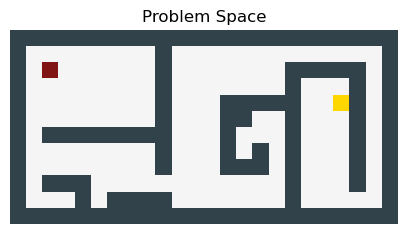

In [93]:
plot_maze(a3_maze, "Problem Space")

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 6 6 6 6 6 6 6 6 1 4 4 4 4 4 4 4 4 4 4 4 4 4 1]
 [1 6 2 6 6 6 6 6 6 1 4 6 6 6 6 6 6 1 1 1 1 1 4 1]
 [1 6 4 6 6 6 6 6 6 1 4 6 6 6 6 6 6 1 0 0 0 1 4 1]
 [1 6 4 6 6 6 6 6 6 1 4 6 6 1 1 1 1 1 0 0 9 1 4 1]
 [1 4 4 6 6 6 6 6 6 1 4 6 6 1 1 6 6 1 0 0 4 1 4 1]
 [1 4 1 1 1 1 1 1 1 1 4 6 6 1 6 6 6 1 0 6 4 1 4 1]
 [1 4 4 4 4 4 4 4 4 1 4 6 6 1 6 1 6 1 6 6 4 1 4 1]
 [1 6 6 6 6 6 6 6 4 1 4 6 6 1 1 1 6 1 6 6 4 1 4 1]
 [1 6 1 1 1 6 6 6 4 4 4 6 6 6 6 6 6 1 6 6 4 1 4 1]
 [1 6 6 6 1 6 1 1 1 1 6 6 6 6 6 6 6 1 6 6 4 4 4 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


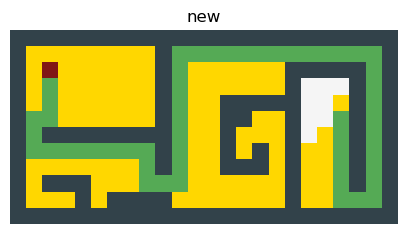

In [94]:
bfs_updated = update_maze_with_path(a3_maze, bfs_solution_path, bfs_traversed, a3_maze_start, a3_maze_goal_point)

print(bfs_updated)

plot_maze(bfs_updated,"new")
#plot = plot_path(a3_maze, a3_maze_start, a3_maze_goal_point, bfs_solution_path, bfs_traversed)


Replot the maze with the traversed and solution

In [95]:
# def update_maze_with_path(maze, path, traversed):
#     for position in traversed:
#         if position != start_point and position != goal_point:
#             maze[position[0], position[1]] = 6  # Mark traversed positions
#     for position in path:
#         if position != start_point and position != goal_point:
#             maze[position[0], position[1]] = 4  # Ensure path is marked last
#     return maze

In [96]:
# def plot_path(maze, start, goal, path, traversed):
#     if start and goal:
#         if path:
#             updated_maze = update_maze_with_path(maze.copy(), path, traversed)
#             plot_maze(updated_maze, "Breadth first search: Solution path")
#             print("Path:", path)
#         else:
#             print("No path found.")
#     else:
#         print("No start point found.")

In [97]:
# updated = update_maze_with_path(maze, path, traversed)
# plot_path(maze, start_point, goal_point, path, traversed)